# PREPROCESSING DATA

In [1]:
import pandas as pd
#read data train
data_asli=pd.read_csv('data_gojek_random_label_3000.csv')

del data_asli['Unnamed: 0']
print len(data_asli)
data_asli.head(30)
data_asli.count()

3000


text       3000
emotion    3000
dtype: int64

In [ ]:
# remove the duplicate tweet
data_asli=data_asli[~data_asli['text'].duplicated()]
data_asli=data_asli.reset_index(drop=True)
print len(data_asli)
print data_asli.text[0]
data_asli.head()

In [2]:
#we choose 30 data as data traing and remain as test 
#data_train=data_asli[0:800]
#data_test=data_asli[200:]|
data_train=data_asli

In [3]:
# convert data to lowercase
import string
for i in range(len(data_train)):
    text = string.lower(data_train['text'].iloc[i])
    data_train['text'].iloc[i]=text
print data_train['text'][0]
data_train.head()

C:\Users\KALIT\Anaconda2\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


@divhumas_polri @ntmclantaspolri selamat buat para pencari uang di grab dan gojek. betapa sulitnya cari uang


,text,emotion
0,@divhumas_polri @ntmclantaspolri selamat buat ...,2
1,"@orangetvid min, musim ini apakah siarin liga ...",3
2,@gojekindonesia pagi2 aplikasi gojek driver sd...,4
3,"kerena semenjak di endorse pwj ama ldh, gojek ...",2
4,"hai! sesuai dengan janji, jadi kita mau ngadai...",0


In [4]:
#remove number
import re
pattern=r'[0-9]+'
for i in range(len(data_train)):
    data_train['text'].iloc[i] = re.sub(pattern,'', data_train['text'].iloc[i], flags=re.MULTILINE)
print data_train['text'][0]
data_train.head()

@divhumas_polri @ntmclantaspolri selamat buat para pencari uang di grab dan gojek. betapa sulitnya cari uang


,text,emotion
0,@divhumas_polri @ntmclantaspolri selamat buat ...,2
1,"@orangetvid min, musim ini apakah siarin liga ...",3
2,@gojekindonesia pagi aplikasi gojek driver sdh...,4
3,"kerena semenjak di endorse pwj ama ldh, gojek ...",2
4,"hai! sesuai dengan janji, jadi kita mau ngadai...",0


In [5]:
#remove URL
import re
pattern=r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*'
for i in range(len(data_train)):
    data_train['text'].iloc[i] = re.sub(pattern,'', data_train['text'].iloc[i], flags=re.MULTILINE)
print data_train.text[0]
data_train.head()

@divhumas_polri @ntmclantaspolri selamat buat para pencari uang di grab dan gojek. betapa sulitnya cari uang


,text,emotion
0,@divhumas_polri @ntmclantaspolri selamat buat ...,2
1,"@orangetvid min, musim ini apakah siarin liga ...",3
2,@gojekindonesia pagi aplikasi gojek driver sdh...,4
3,"kerena semenjak di endorse pwj ama ldh, gojek ...",2
4,"hai! sesuai dengan janji, jadi kita mau ngadai...",0


In [6]:
#remove RT
pattern=r'rt @\w+: '
for i in range(len(data_train)):
    data_train['text'].iloc[i] = re.sub(pattern,'', data_train['text'].iloc[i], flags=re.MULTILINE)
print data_train['text'][0]
data_train.head()

@divhumas_polri @ntmclantaspolri selamat buat para pencari uang di grab dan gojek. betapa sulitnya cari uang


,text,emotion
0,@divhumas_polri @ntmclantaspolri selamat buat ...,2
1,"@orangetvid min, musim ini apakah siarin liga ...",3
2,@gojekindonesia pagi aplikasi gojek driver sdh...,4
3,"kerena semenjak di endorse pwj ama ldh, gojek ...",2
4,"hai! sesuai dengan janji, jadi kita mau ngadai...",0


In [7]:
#remove @
pattern=r'@\w+ '
for i in range(len(data_train)):
    data_train['text'].iloc[i] = re.sub(pattern,'', data_train['text'].iloc[i], flags=re.MULTILINE)
data_train.head()

,text,emotion
0,selamat buat para pencari uang di grab dan goj...,2
1,"min, musim ini apakah siarin liga gojek indonesia",3
2,pagi aplikasi gojek driver sdh error...pembaya...,4
3,"kerena semenjak di endorse pwj ama ldh, gojek ...",2
4,"hai! sesuai dengan janji, jadi kita mau ngadai...",0


In [8]:
#remove bad character
#[^A-Za-z ]
import re
pattern=r'[^A-Za-z ]'
for i in range(len(data_train)):
    data_train['text'].iloc[i] = re.sub(pattern,'', data_train['text'].iloc[i], flags=re.MULTILINE)
print data_train['text'][0]
data_train.head()

selamat buat para pencari uang di grab dan gojek betapa sulitnya cari uang


,text,emotion
0,selamat buat para pencari uang di grab dan goj...,2
1,min musim ini apakah siarin liga gojek indonesia,3
2,pagi aplikasi gojek driver sdh errorpembayaran...,4
3,kerena semenjak di endorse pwj ama ldh gojek n...,2
4,hai sesuai dengan janji jadi kita mau ngadain ...,0


In [9]:
# remove punctuation
import string
string.punctuation
remove=string.punctuation
for i in range(len(data_train)):''
sent=data_train['text'].iloc[i]
kd=' '.join(word.strip(remove) for word in sent.split())
data_train['text'].iloc[i]=kd
print data_train.text[0]
data_train.head()

selamat buat para pencari uang di grab dan gojek betapa sulitnya cari uang


,text,emotion
0,selamat buat para pencari uang di grab dan goj...,2
1,min musim ini apakah siarin liga gojek indonesia,3
2,pagi aplikasi gojek driver sdh errorpembayaran...,4
3,kerena semenjak di endorse pwj ama ldh gojek n...,2
4,hai sesuai dengan janji jadi kita mau ngadain ...,0


In [10]:
# normalization
import re
import string
import csv

reader = csv.reader(open('corpus/normalisasi.csv', 'r'))
d = {}
for row in reader:
    k,v= row
    d[string.lower(k)] = string.lower(v)
    #print d[k]
pat = re.compile(r"\b(%s)\b" % "|".join(d))
for i in range(len(data_train)):
    text = string.lower(data_train['text'].iloc[i])
    text = pat.sub(lambda m: d.get(m.group()), text)
    #print text
    data_train['text'].iloc[i]=text
print data_train.text[0]
data_train.head(10)

selamat buat para pencari uang di grab dan gojek betapa sulitnya cari uang


,text,emotion
0,selamat buat para pencari uang di grab dan goj...,2
1,admin musim ini apakah siarin liga gojek indon...,3
2,pagi aplikasi gojek driver sudah errorpembayar...,4
3,kerena semenjak di endorse pwj ama ldh gojek n...,2
4,hai sesuai dengan janji jadi kita mau ngadain ...,0
5,ya iyalah hyung emg gojek milik bapak lu,2
6,cara dapat pulsa gratis bagi drivergojek,0
7,telah berpulang bapak sopiin driver gojek sete...,3
8,halo admin apakah gojek buka lowongan magang a...,1
9,ketika ibu sakit parah saya takut dia akan men...,1


In [11]:
# remove stopwords
import nltk 
from nltk.corpus import stopwords
reader=pd.read_excel('corpus/stopword_id.xls',header=None)
cachedStopWords = set(stopwords.words("english"))
cachedStopWords.update(reader[0][:])
for i in range(len(data_train)):
    sent=data_train['text'].iloc[i]
    kt=" ".join([word for word in sent.split() if word not in cachedStopWords])
    data_train['text'].iloc[i]=kt
print data_train.text[0]
data_train.head(10)
data_train.to_csv('data_gojek_random_label_3000_after_punctuation.csv',encoding='utf-8')

selamat pencari uang grab gojek betapa sulitnya cari uang


In [ ]:
#data_train=pd.read_csv('data_gojek_campur_after_punctuation.csv')

In [12]:
# stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
for i in range(len(data_train)):
    sent=data_train['text'].iloc[i]
    output = stemmer.stem(sent)
    data_train['text'].iloc[i]=output
print data_train.text[0]
data_train

selamat cari uang grab gojek betapa sulit cari uang


,text,emotion
0,selamat cari uang grab gojek betapa sulit cari...,2
1,admin musim siarin liga gojek indonesia,3
2,pagi aplikasi gojek driver errorpembayaran gop...,4
3,rena semenjak endorse pwj ama ldh gojek naikin...,2
4,hai sesuai janji ngadain event tepat minggu ta...,0
5,ya iya hyung emg gojek milik lu,2
6,pulsa gratis drivergojek,0
7,pulang sopiin driver gojek koma rumah sakit ak...,3
8,halo admin gojek buka lowong magang anak smk j...,1
9,sakit parah takut tinggal,1


In [13]:
data_proses=data_train
data_proses.to_csv('data_gojek_random_label_3000_after_stemmed.csv',encoding='utf-8')

## CHECK DATA

In [ ]:
import pandas as pd

#data = pandas.read_csv('cleanfile.csv', dtype={'emotion': int})
data_=pd.read_csv('data_gojek_random_label_3000_after_stemmed.csv')
data_ = data_.dropna()
data_=data_.reset_index(drop=True)
#del data_train['Unnamed: 0.1']
del data_['Unnamed: 0']
print len(data_)
data_.head()
data_.to_csv('data_gojek_random_label_3000_after_stemmed.csv',encoding='utf-8')

In [ ]:
data_ = pd.read_csv('data_gojek_random_label_3000_after_stemmed.csv', dtype={'emotion': int})
data_=data_.reset_index(drop=True)
del data_['Unnamed: 0']
print data_.count()
data_.emotion.value_counts()
data_.head()
data_.to_csv('data_gojek_random_label_3000_after_stemmed.csv',encoding='utf-8')

In [ ]:
data_train = data_

# DATA SAMPLE 

In [20]:
import pandas as pd
data_sample=pd.read_csv('data_gojek_sample_after_stemmed.csv')
data_sample=data_sample.reset_index(drop=True)
del data_sample['Unnamed: 0']
print len(data_sample)
data_sample

36


,text,emotion
0,berkat gojek grab ketemu temen teman lama grat...,0
1,suka pakai gojek pakai gopay gua suka pakai gr...,0
2,naik gojek gojek kaget sendi,5
3,tinggal depok masker jawab males ngambil krn b...,2
4,rek gojek blokir krn salah masuk pin buka nya ...,3
5,pakai gps jalan gojek jemput gue kantor gue ma...,3
6,driver gojek sekarang hp tinggal helm balikin ...,5
7,hapus akun gojek,4
8,pdkt gapapa jemput pergi sih,3
9,rating tips aplikasi gojek error rating dan,5


In [21]:
data_sample.emotion.value_counts()

5    6
4    6
3    6
2    6
1    6
0    6
Name: emotion, dtype: int64

# FEATURE EXTRACTION

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(data_train.text)
print X_train_counts.shape
count_vect.vocabulary_

(3000, 3670)


{u'pinjam': 2588,
 u'lelaki': 1836,
 u'bersliweran': 378,
 u'ujung': 3513,
 u'shopeenya': 3065,
 u'gabung': 978,
 u'murung': 2163,
 u'hati': 1204,
 u'seharihari': 2952,
 u'resor': 2791,
 u'putus': 2718,
 u'porno': 2635,
 u'dalem': 664,
 u'lereng': 1850,
 u'pasang': 2482,
 u'bayi': 297,
 u'masukpoint': 2020,
 u'aum': 189,
 u'gteborg': 1138,
 u'bgitu': 385,
 u'anyep': 130,
 u'selep': 2976,
 u'paramiliter': 2473,
 u'mengatasnamakan': 2060,
 u'abis': 5,
 u'sorry': 3149,
 u'direjek': 774,
 u'manis': 1987,
 u'renang': 2780,
 u'indonesiamakanya': 1303,
 u'mata': 2022,
 u'kuda': 1744,
 u'delu': 700,
 u'nadiem': 2172,
 u'bintaromending': 417,
 u'manado': 1977,
 u'kudu': 1745,
 u'teror': 3359,
 u'pasti': 2488,
 u'senin': 3011,
 u'ojek': 2372,
 u'mizkin': 2117,
 u'dompet': 814,
 u'kemaren': 1567,
 u'kendala': 1580,
 u'dramaojol': 824,
 u'murni': 2162,
 u'edisi': 856,
 u'ajaib': 43,
 u'kunci': 1752,
 u'dikmblkn': 759,
 u'termikasi': 3356,
 u'mnimpa': 2120,
 u'eleuh': 872,
 u'galau': 991,
 u'nauste

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print X_train_tfidf.shape
print(tfidf_transformer.fit_transform(count_vect.fit_transform(data_train.text)).toarray())

(3000, 3670)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [16]:
y_emotion = data_train['emotion']

## CROSS VALIDATION

### K-FOLD

In [17]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve,roc_curve,auc,classification_report

data_X = X_train_tfidf
kf = KFold(n_splits=10)
for train, test in kf.split(data_X):
    #print("%s %s\n " % (train, test))
    X = X_train_tfidf
    y = y_emotion
    #print train
    print test
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    print("Size of training set: {} size of test set: {}\n".format(X_train.shape, X_test.shape))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y_emotion, test_size = 0.2, random_state=42)

# TRAINING

# SVM

## RBF KERNEL

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

svm_rbf = SVC(kernel='rbf').fit(X_train, y_train)
#print(clf.predict(X_train_counts))
#print(clf.predict_proba(X_train_counts))
#print(clf.classes_)
#print(clf.coef_)
#print(clf.intercept_)

predicted = svm_rbf.predict(X_test)
print predicted

accuracy = accuracy_score(y_test, predicted)
print 'The resulting accuracy using RBF is ', (100 * accuracy), '%\n'

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4]
The resulting accuracy using RBF is  17.0 %



In [22]:
from sklearn.externals import joblib
data_samples = data_sample.text.values.tolist()
#data_samples

joblib.dump(svm_rbf, 'svm_rbf_model.pkl') 
model = joblib.load('svm_rbf_model.pkl')

docs_new = data_samples

X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = model.predict(X_new_tfidf)

#data_sample.emotion
print predicted

accuracy = accuracy_score(data_sample.emotion, predicted)
print 'The resulting accuracy using SVC is ', (100 * accuracy), '%\n'

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
The resulting accuracy using SVC is  16.6666666667 %



## RBF KERNEL HYPERPARAMETER

In [23]:
from sklearn.svm import SVC
best_score = 0
for gamma in [0.01, 0.03, 0.04, 0.06, 0.09, 0.1, 0.3, 0.6, 1, 3, 6, 9, 10]:
    for C in [0.01, 0.03, 0.04, 0.06, 0.09, 0.1, 0.3, 0.6, 1, 3, 6, 9, 10]:
        # for each combination of parameters, train an SVC
        svm_rbf = SVC(kernel='rbf', gamma=gamma, C=C)
        svm_rbf.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm_rbf.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        print (svm_rbf.predict(X_test))
        predict = svm_rbf.predict(X_test)
        mean = score
        params = {'C': C, 'gamma': gamma}
        print("%0.3f for %r" % (mean, params))

        
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
        
#print(svm.predict(best_score))
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4]
0.170 for {'C': 0.01, 'gamma': 0.01}
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4]
0.170 for {'C': 0.01, 'gamma': 0.03}
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4]
0.170 for {'C': 0.01, 'gamma': 0.04}
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4]
0.170 for {'C': 0.01, 'gamma': 0.06}
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4]
0.170 for {'C': 0.01, 'gamma': 0.09}
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4]
0.170 for {'C': 0.01, 'gamma': 0.1}
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4]
0.170 for {'C': 0.01, 'gamma': 0.3}
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4]
0.170 for {'C': 0.01, 'gamma': 0.6}
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4]
0.170 for {'C': 0.01, 'gamma': 1}
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4]
0.170 for {'C': 0.01, 'gamma': 3}
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4]
0.170 for {'C': 0.01, 'gamma': 6}
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4]
0.170 for {'C': 0.01, 'gamma': 9}
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4]
0.170 for {'C': 0.01, 'gamma': 10}
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 

In [28]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, predict)
conf

array([[42,  0,  0,  0, 17,  0],
       [ 0, 43,  0,  0, 13,  0],
       [ 0,  0, 37,  0, 13,  0],
       [ 0,  0,  0, 29, 10,  1],
       [ 1,  0,  0,  0, 50,  0],
       [ 0,  0,  0,  0, 14, 30]])

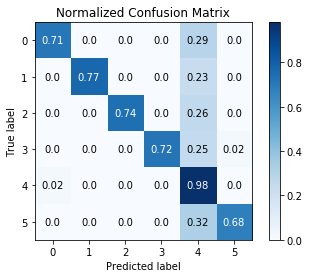

In [29]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, predict, normalize=True)

## ==

In [30]:
from sklearn.externals import joblib
data_samples = data_sample.text.values.tolist()
#data_samples

joblib.dump(svm_rbf, 'svm_rbf_hp_model.pkl') 
model = joblib.load('svm_rbf_hp_model.pkl')

docs_new = data_samples

X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = model.predict(X_new_tfidf)

#data_sample.emotion
print predicted

accuracy = accuracy_score(data_sample.emotion, predicted)
print 'The resulting accuracy using SVC is ', (100 * accuracy), '%\n'

[4 4 4 2 4 3 5 4 4 4 4 4 4 4 4 2 4 4 0 4 4 1 1 4 1 4 4 4 4 4 3 4 4 4 4 4]
The resulting accuracy using SVC is  41.6666666667 %



In [31]:
conf = confusion_matrix(data_sample.emotion, predicted)
conf

array([[1, 0, 0, 0, 5, 0],
       [0, 3, 0, 0, 3, 0],
       [0, 0, 2, 0, 4, 0],
       [0, 0, 0, 2, 4, 0],
       [0, 0, 0, 0, 6, 0],
       [0, 0, 0, 0, 5, 1]])

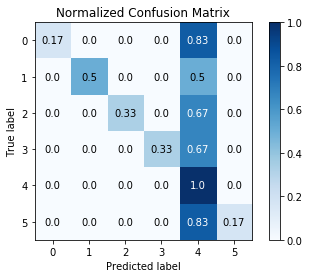

In [32]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(data_sample.emotion, predicted, normalize=True)

## RBF KERNEL HYPERPARAMETER

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_grid = [{'kernel': ['rbf'],
               'C': [0.01, 0.03, 0.06, 0.09, 0.1, 0.3, 0.6, 1, 3, 6, 9, 10],
               'gamma': [0.01, 0.03, 0.06, 0.09, 0.1, 0.3, 0.6, 1, 3, 6, 9, 10]}]

print("List of grids:\n{}".format(param_grid))
grid_search = GridSearchCV(SVC(), param_grid)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))

print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

List of grids:
[{'kernel': ['rbf'], 'C': [0.01, 0.03, 0.06, 0.09, 0.1, 0.3, 0.6, 1, 3, 6, 9, 10], 'gamma': [0.01, 0.03, 0.06, 0.09, 0.1, 0.3, 0.6, 1, 3, 6, 9, 10]}]
Best parameters: {'kernel': 'rbf', 'C': 9, 'gamma': 0.3}
Best cross-validation score: 0.75


In [74]:
from time import time

t0 = time()

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
pred_svm_rbf_hp = grid_search.predict(X_test)
print("done in %0.3fs" % (time() - t0))
print pred_svm_rbf_hp
print(classification_report(y_test, pred_svm_rbf_hp))
accuracy = accuracy_score(y_test, pred_svm_rbf_hp)
print 'The resulting accuracy using SVC is ', (100 * accuracy), '%\n'

done in 0.059s
[3 3 3 0 1 4 0 3 4 1 5 0 4 5 0 2 1 0 1 4 1 0 5 4 1 3 5 5 0 5 1 2 3 0 4 0 2
 0 1 3 0 2 1 2 3 2 3 5 0 1 4 5 4 1 1 1 4 2 0 0 0 3 5 5 4 4 1 4 1 1 1 3 5 5
 3 2 3 1 5 2 0 0 1 3 5 2 3 5 0 5 4 2 0 0 4 4 2 5 2 2 1 4 0 1 3 0 3 4 1 4 2
 1 0 4 1 2 1 4 0 0 4 4 2 2 0 4 0 0 0 0 2 1 4 4 5 4 5 0 3 4 4 2 1 4 0 3 0 4
 4 3 0 2 2 2 0 3 3 3 2 3 4 4 1 1 2 5 1 0 2 1 3 1 1 1 2 5 0 0 4 0 3 5 0 1 4
 1 5 4 1 4 1 1 1 2 2 0 4 4 1 4 2 2 3 0 4 5 0 1 1 2 0 5 2 3 4 2 2 2 3 1 0 4
 5 5 2 4 4 4 3 4 5 5 2 2 0 0 1 2 0 5 0 2 4 2 0 5 0 5 3 2 5 5 1 3 1 4 3 5 1
 5 5 5 2 0 0 2 2 1 0 1 1 1 2 1 4 3 0 1 5 4 0 2 4 5 3 3 1 3 2 0 3 2 1 0 1 4
 4 2 0 4]
             precision    recall  f1-score   support

          0       0.88      0.88      0.88        59
          1       0.91      0.93      0.92        56
          2       0.73      0.74      0.73        50
          3       0.84      0.80      0.82        40
          4       0.80      0.86      0.83        51
          5       0.88      0.80      0.83        44

av

In [75]:
conf = confusion_matrix(y_test, pred_svm_rbf_hp)
conf

array([[52,  0,  4,  1,  2,  0],
       [ 0, 52,  2,  0,  2,  0],
       [ 4,  1, 37,  3,  2,  3],
       [ 2,  0,  1, 32,  3,  2],
       [ 1,  0,  6,  0, 44,  0],
       [ 0,  4,  1,  2,  2, 35]])

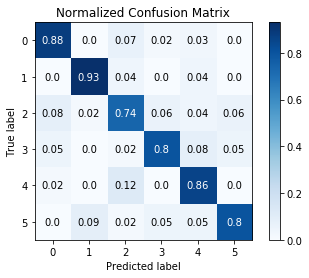

In [76]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, pred_svm_rbf_hp, normalize=True)

## ==

In [37]:
from sklearn.externals import joblib
data_samples = data_sample.text.values.tolist()
#data_samples

joblib.dump(grid_search, 'svm_rbf_gs_hp_model.pkl') 
model = joblib.load('svm_rbf_gs_hp_model.pkl')

docs_new = data_samples

X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = model.predict(X_new_tfidf)

#data_sample.emotion
print predicted

accuracy = accuracy_score(data_sample.emotion, predicted)
print 'The resulting accuracy using SVC is ', (100 * accuracy), '%\n'
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(predicted,data_sample.emotion)
conf

[5 2 0 2 3 3 5 2 3 3 3 0 0 3 3 2 2 2 0 0 2 1 1 5 1 3 0 5 5 0 3 4 4 4 3 3]
The resulting accuracy using SVC is  61.1111111111 %



array([[3, 0, 2, 0, 0, 2],
       [0, 3, 0, 0, 0, 0],
       [1, 1, 4, 0, 1, 0],
       [1, 1, 0, 6, 2, 1],
       [0, 0, 0, 0, 3, 0],
       [1, 1, 0, 0, 0, 3]])

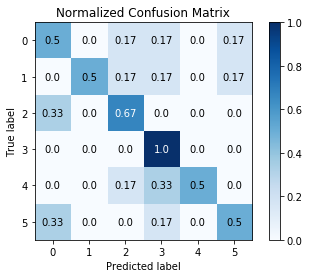

In [38]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(data_sample.emotion, predicted, normalize=True)

In [39]:
print(classification_report(data_sample.emotion, predicted))

             precision    recall  f1-score   support

          0       0.43      0.50      0.46         6
          1       1.00      0.50      0.67         6
          2       0.57      0.67      0.62         6
          3       0.55      1.00      0.71         6
          4       1.00      0.50      0.67         6
          5       0.60      0.50      0.55         6

avg / total       0.69      0.61      0.61        36



## LINEAR KERNEL

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.svm import SVC,LinearSVC

clf = LinearSVC().fit(X_train, y_train)
#print(clf.predict(X_train_counts))
#print(clf.predict_proba(X_train_counts))
print(clf.classes_)
print(clf.coef_)

predicted = clf.predict(X_test)
print predicted
clf.score(X_test, y_test)    


accuracy = accuracy_score(y_test, predicted)
print 'The resulting accuracy using SVC is ', (100 * accuracy), '%\n'
print(classification_report(y_test, predicted))

[0 1 2 3 4 5]
[[ -1.22317895e-01  -7.88312729e-03   4.56519570e-01 ...,  -1.35853189e-01
   -2.69497940e-01  -2.63926948e-01]
 [ -3.58755078e-02  -3.37776211e-01  -4.47990973e-01 ...,  -6.35764748e-02
   -1.25471863e-01   0.00000000e+00]
 [ -5.00720459e-01   5.14727769e-01  -5.61808010e-01 ...,   0.00000000e+00
    6.65799822e-01   3.74139056e-01]
 [  1.08098446e+00  -1.07682690e-01   1.19107453e-01 ...,  -1.81316856e-01
   -2.29588970e-04  -4.10163938e-02]
 [ -2.31065889e-01   3.61742317e-01   3.92407927e-01 ...,   3.73200543e-01
   -2.08525634e-02  -1.73472348e-18]
 [ -1.12265616e-01  -2.58322444e-01  -3.59061025e-01 ...,   8.67361738e-19
   -8.10543233e-02  -4.23722249e-02]]
[3 3 3 0 1 4 0 3 4 1 5 0 4 5 0 2 1 0 4 4 1 0 5 4 1 3 5 5 0 5 2 2 3 0 4 0 2
 0 1 3 0 2 1 2 3 2 3 5 5 1 4 5 4 1 1 1 4 2 0 0 0 1 5 5 4 4 1 4 1 1 1 3 5 5
 3 0 3 1 5 2 0 0 1 3 5 2 3 5 0 5 4 2 0 0 4 4 2 5 2 2 2 4 2 1 3 4 3 4 1 4 2
 1 0 4 1 4 1 4 0 0 4 4 2 2 3 4 0 0 0 0 2 1 4 4 5 4 5 0 3 4 4 2 1 4 0 3 0 4
 4 3 0 2 2 2 

In [41]:
confusion_matrix(y_test,predicted)

array([[48,  0,  4,  3,  3,  1],
       [ 0, 49,  2,  0,  5,  0],
       [ 2,  2, 37,  3,  3,  3],
       [ 1,  0,  1, 32,  4,  2],
       [ 2,  1,  3,  1, 44,  0],
       [ 0,  2,  3,  2,  2, 35]])

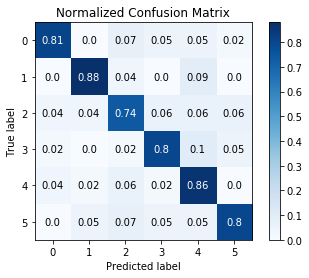

In [42]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,predicted, normalize=True)

## ==

In [43]:
from sklearn.externals import joblib
data_samples = data_sample.text.values.tolist()
#data_samples

joblib.dump(clf, 'svm_linear_model.pkl') 
model = joblib.load('svm_linear_model.pkl')

docs_new =  

X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = model.predict(X_new_tfidf)

#data_sample.emotion
print predicted

accuracy = accuracy_score(data_sample.emotion, predicted)
print 'The resulting accuracy using SVC is ', (100 * accuracy), '%\n'

[5 2 3 2 3 3 5 3 3 3 2 0 0 3 0 2 2 2 0 0 2 1 1 1 1 3 0 5 1 0 3 4 4 4 3 4]
The resulting accuracy using SVC is  63.8888888889 %



In [44]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(data_sample.emotion,predicted)
conf

array([[4, 0, 1, 0, 0, 1],
       [0, 4, 1, 1, 0, 0],
       [2, 0, 4, 0, 0, 0],
       [0, 0, 1, 5, 0, 0],
       [0, 0, 0, 2, 4, 0],
       [1, 1, 0, 2, 0, 2]])

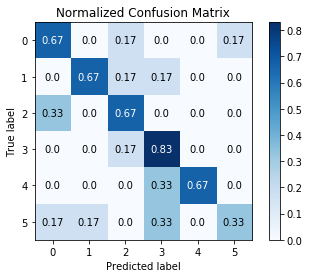

In [45]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(data_sample.emotion,predicted, normalize=True)

## LINEAR KERNEL HYPERPARAMETER

In [46]:
from sklearn.svm import SVC
best_score = 0
for C in [0.01, 0.03, 0.04, 0.06, 0.09, 0.1, 0.3, 0.6, 1, 3, 6, 9, 10]:
        # for each combination of parameters, train an SVC
        linearsvm = SVC(kernel='linear', C=C)
        linearsvm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = linearsvm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        print (linearsvm.predict(X_test))
        mean = score
        params = {'C': C}
        print("%0.3f for %r" % (mean, params))
        
        if score > best_score:
            best_score = score
            best_parameters = {'C': C}
            
#print(svm.predict(best_score))
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4]
0.170 for {'C': 0.01}
[4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

## ==

In [47]:
from sklearn.externals import joblib
data_samples = data_sample.text.values.tolist()
#data_samples

joblib.dump(linearsvm, 'svm_linear_hp_model.pkl') 
model = joblib.load('svm_linear_hp_model.pkl')

docs_new = data_samples

X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = model.predict(X_new_tfidf)

#print data_sample.emotion
print predicted

accuracy = accuracy_score(data_sample.emotion,predicted)
print 'The resulting accuracy using SVC is ', (100 * accuracy), '%\n'

print(classification_report(data_sample.emotion,predicted))

[5 2 0 2 3 3 5 2 3 3 3 0 0 3 3 2 2 2 0 0 2 1 1 1 1 3 0 5 5 0 3 4 4 4 3 4]
The resulting accuracy using SVC is  66.6666666667 %

             precision    recall  f1-score   support

          0       0.43      0.50      0.46         6
          1       1.00      0.67      0.80         6
          2       0.57      0.67      0.62         6
          3       0.60      1.00      0.75         6
          4       1.00      0.67      0.80         6
          5       0.75      0.50      0.60         6

avg / total       0.73      0.67      0.67        36



In [48]:
confusion_matrix(data_sample.emotion,predicted)

array([[3, 0, 1, 1, 0, 1],
       [0, 4, 1, 1, 0, 0],
       [2, 0, 4, 0, 0, 0],
       [0, 0, 0, 6, 0, 0],
       [0, 0, 1, 1, 4, 0],
       [2, 0, 0, 1, 0, 3]])

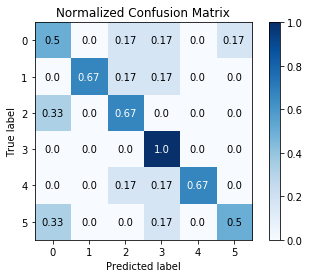

In [49]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(data_sample.emotion,predicted, normalize=True)

## ==

### POLYNOMIAL KERNEL

In [50]:
from sklearn import svm

clf = SVC(kernel='poly').fit(X_train, y_train)
#print(clf.predict(X_train_counts))
#print(clf.predict_proba(X_train_counts))
#print(clf.classes_)
#print(clf.coef_)
#print(clf.intercept_)

predicted = clf.predict(X_test)
print predicted

accuracy = accuracy_score(y_test, predicted)
print 'The resulting accuracy using Polynomial is ', (100 * accuracy), '%\n'

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4]
The resulting accuracy using Polynomial is  17.0 %



In [51]:
from sklearn.svm import SVC
best_score = 0
for C in [0.01, 0.03, 0.04, 0.06, 0.09, 0.1, 0.3, 0.6, 1, 3, 6, 9, 10]:
        # for each combination of parameters, train an SVC
        svm = SVC(kernel='poly',degree=3, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        print (svm.predict(X_test))
        mean = score
        params = {'C': C}
        print("%0.3f for %r" % (mean, params))
        
        if score > best_score:
            best_score = score
            best_parameters = {'C': C}
            
#print(svm.predict(best_score))
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4]
0.170 for {'C': 0.01}
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

In [52]:
print  confusion_matrix(y_test, predicted)



[[ 0  0  0  0 59  0]
 [ 0  0  0  0 56  0]
 [ 0  0  0  0 50  0]
 [ 0  0  0  0 40  0]
 [ 0  0  0  0 51  0]
 [ 0  0  0  0 44  0]]


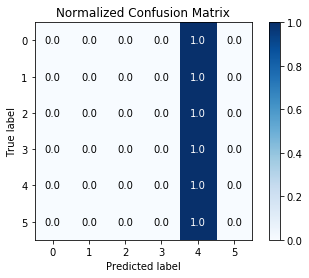

In [53]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, predicted,normalize=True)

## ==

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
The resulting accuracy using SVC is  16.6666666667 %

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         6
          1       0.00      0.00      0.00         6
          2       0.00      0.00      0.00         6
          3       0.00      0.00      0.00         6
          4       0.17      1.00      0.29         6
          5       0.00      0.00      0.00         6

avg / total       0.03      0.17      0.05        36

[[0 0 0 0 6 0]
 [0 0 0 0 6 0]
 [0 0 0 0 6 0]
 [0 0 0 0 6 0]
 [0 0 0 0 6 0]
 [0 0 0 0 6 0]]


C:\Users\KALIT\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


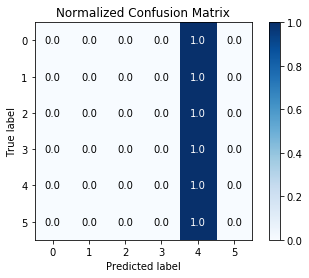

In [54]:
from sklearn.externals import joblib
data_samples = data_sample.text.values.tolist()
#data_samples

joblib.dump(svm, 'svm_linear_hp_model.pkl') 
model = joblib.load('svm_linear_hp_model.pkl')

docs_new = data_samples

X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = model.predict(X_new_tfidf)

#print data_sample.emotion
print predicted

accuracy = accuracy_score(data_sample.emotion, predicted)
print 'The resulting accuracy using SVC is ', (100 * accuracy), '%\n'

print(classification_report(data_sample.emotion,predicted))

print  confusion_matrix(data_sample.emotion, predicted, )


import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(data_sample.emotion,predicted,normalize=True)

## ==

### SIGMOID KERNEL

In [55]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.svm import SVC,LinearSVC

sigmoid = SVC(kernel='sigmoid').fit(X_train, y_train)
#print(clf.predict(X_train_counts))
#print(clf.predict_proba(X_train_counts))
print(clf.classes_)
#print(clf.coef_)
#print(clf.intercept_)

predicted_sigmoid = sigmoid.predict(X_test)
print predicted_sigmoid
clf.score(X_test, y_test)    

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted_sigmoid)
print 'The resulting accuracy using SVC is ', (100 * accuracy), '%\n'

[0 1 2 3 4 5]
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4]
The resulting accuracy using SVC is  17.0 %



In [56]:
from sklearn.svm import SVC
best_score = 0
for C in [0.01, 0.03, 0.04, 0.06, 0.09, 0.1, 0.3, 0.6, 1, 3, 6, 9, 10]:
        # for each combination of parameters, train an SVC
        svm = SVC(kernel='sigmoid', C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        print (svm.predict(X_test))
        mean = score
        params = {'C': C}
        print("%0.3f for %r" % (mean, params))
        
        if score > best_score:
            best_score = score
            best_parameters = {'C': C}
            
#print(svm.predict(best_score))
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4]
0.170 for {'C': 0.01}
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

[[ 0  0  0  0 59  0]
 [ 0  0  0  0 56  0]
 [ 0  0  0  0 50  0]
 [ 0  0  0  0 40  0]
 [ 0  0  0  0 51  0]
 [ 0  0  0  0 44  0]]


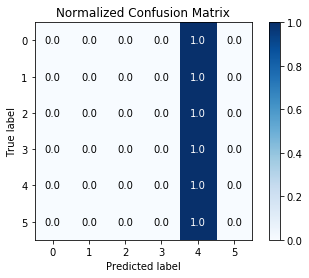

In [57]:
print  confusion_matrix(y_test, predicted_sigmoid)

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,predicted_sigmoid,normalize=True)

# NEURAL NETWORK

# MLP

In [58]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from time import time
from sklearn.neural_network import MLPClassifier
import logging

In [59]:
t0 = time()

clf_MLP = MLPClassifier().fit(X_train, y_train)

print("done in %0.3fs" % (time() - t0))

done in 49.091s


In [60]:
print("MLP  PREDICTING   ")
t0 = time()
#MLP
y_pred_MLP = clf_MLP.predict(X_test)
print("done in %0.3fs" % (time() - t0))
print y_pred_MLP
#Print Evaluation (classification report)predicted,data_sample.emotion
print(classification_report( y_test, y_pred_MLP))
accuracy = accuracy_score( y_test, y_pred_MLP,)
print 'The resulting accuracy using MLP is ', (100 * accuracy), '%\n'

MLP  PREDICTING   
done in 0.003s
[3 3 3 0 5 4 0 3 4 1 5 0 4 5 0 2 1 0 4 4 1 0 5 4 1 3 5 5 0 5 2 2 4 0 4 0 2
 0 1 3 0 2 1 2 3 2 3 5 0 1 4 5 4 1 1 1 4 2 0 0 0 1 5 5 4 4 1 4 1 1 1 4 5 5
 3 1 3 1 5 2 0 5 1 3 5 2 3 5 0 5 4 2 0 0 4 4 2 5 2 2 2 4 2 1 3 2 1 4 1 4 2
 1 0 4 1 4 1 4 0 0 4 4 2 2 0 4 0 0 0 0 2 1 4 4 5 4 5 0 3 4 4 2 1 4 0 3 0 4
 4 3 0 2 2 2 0 3 3 3 2 3 4 4 1 1 2 5 1 0 2 1 3 1 1 1 2 5 0 0 4 0 3 5 0 1 4
 1 5 4 1 4 1 1 1 2 2 3 1 4 4 4 2 2 3 0 4 5 0 1 1 2 0 5 2 3 4 2 2 2 3 1 0 4
 5 5 2 4 4 4 3 4 5 5 2 2 0 0 1 2 2 5 0 2 4 2 0 2 0 5 3 2 5 5 1 3 1 4 3 5 1
 5 5 5 2 0 0 2 2 1 0 1 1 1 2 1 4 3 0 1 5 4 0 2 1 5 3 3 1 4 2 0 3 2 1 0 4 4
 4 2 2 4]
             precision    recall  f1-score   support

          0       0.94      0.85      0.89        59
          1       0.88      0.88      0.88        56
          2       0.70      0.78      0.74        50
          3       0.85      0.72      0.78        40
          4       0.72      0.84      0.77        51
          5       0.85      0.80     

In [61]:
confusion_matrix(y_test,y_pred_MLP)

array([[50,  0,  4,  1,  3,  1],
       [ 0, 49,  2,  0,  4,  1],
       [ 2,  2, 39,  2,  3,  2],
       [ 0,  1,  3, 29,  5,  2],
       [ 1,  2,  5,  0, 43,  0],
       [ 0,  2,  3,  2,  2, 35]])

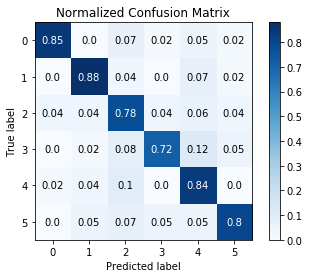

In [62]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred_MLP, normalize=True)

## ==

In [63]:
from sklearn.externals import joblib
data_samples = data_sample.text.values.tolist()
#data_samples

joblib.dump(clf_MLP, 'mlp_model.pkl') 
model = joblib.load('mlp_model.pkl')

docs_new = data_samples

X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted_mlp = model.predict(X_new_tfidf)

#print data_sample.emotion
print predicted_mlp

accuracy = accuracy_score(data_sample.emotion, predicted_mlp)
print 'The resulting accuracy using SVC is ', (100 * accuracy), '%\n'

print(classification_report(data_sample.emotion, predicted_mlp))

[5 2 3 2 3 3 5 2 3 2 2 0 0 3 3 2 2 2 0 0 2 1 1 5 1 3 3 5 5 0 3 4 4 4 3 3]
The resulting accuracy using SVC is  55.5555555556 %

             precision    recall  f1-score   support

          0       0.40      0.33      0.36         6
          1       1.00      0.50      0.67         6
          2       0.44      0.67      0.53         6
          3       0.45      0.83      0.59         6
          4       1.00      0.50      0.67         6
          5       0.60      0.50      0.55         6

avg / total       0.65      0.56      0.56        36



In [64]:
confusion_matrix( data_sample.emotion, predicted_mlp)

array([[2, 0, 1, 2, 0, 1],
       [0, 3, 1, 1, 0, 1],
       [2, 0, 4, 0, 0, 0],
       [0, 0, 1, 5, 0, 0],
       [0, 0, 1, 2, 3, 0],
       [1, 0, 1, 1, 0, 3]])

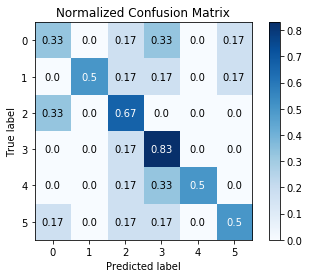

In [65]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(data_sample.emotion,predicted_mlp, normalize=True)

# MLP HYPERPARAMETER

In [66]:
t0 = time()
param_grid_MLP = {'alpha': [0.01, 0.03, 0.04, 0.06, 0.09, 0.1, 0.3, 0.6, 1, 3, 6, 9, 10],
              'hidden_layer_sizes': [(90,90),(20,20),(30,30)], }
clf_MLP_hp = GridSearchCV(MLPClassifier(), param_grid_MLP)
clf_MLP_hp = clf_MLP_hp.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf_MLP_hp.best_estimator_)

C:\Users\KALIT\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


done in 1273.201s
Best estimator found by grid search:
MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(90, 90), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [67]:
print("MLP  PREDICTING   ")
t0 = time()
#MLP
y_pred_MLP = clf_MLP_hp.predict(X_test)
print("done in %0.3fs" % (time() - t0))
print y_pred_MLP
#Print Evaluation (classification report)
print(classification_report(y_test, y_pred_MLP))
accuracy = accuracy_score(y_test, y_pred_MLP)
print 'The resulting accuracy using MLP Hyperparameter is ', (100 * accuracy), '%\n'

MLP  PREDICTING   
done in 0.002s
[3 3 3 0 1 4 0 3 4 1 5 3 4 5 0 2 1 0 4 4 1 0 5 4 1 3 5 5 0 5 2 2 3 0 4 0 2
 3 1 3 0 2 1 2 3 2 3 5 0 1 4 5 4 1 1 1 4 2 0 0 0 3 5 5 4 4 1 4 1 1 1 3 5 5
 3 0 3 1 5 2 0 0 1 3 5 2 3 5 0 5 4 2 0 0 4 4 2 5 2 2 2 4 0 1 3 4 3 4 1 4 2
 1 0 4 1 2 1 4 0 0 4 4 2 2 3 4 0 0 0 0 2 1 4 4 5 4 5 0 3 4 4 3 1 4 0 3 0 4
 4 3 0 2 2 2 0 3 3 3 2 3 4 4 1 1 2 5 1 0 2 1 3 1 1 1 2 5 0 0 4 0 3 5 0 1 4
 1 5 4 1 4 1 1 1 2 2 3 4 4 4 4 2 2 3 3 4 5 0 1 1 2 0 5 2 3 4 2 2 2 3 1 0 4
 5 5 2 4 4 4 3 4 5 5 3 2 0 0 1 2 0 5 0 2 4 2 0 5 0 5 3 2 5 5 1 3 1 4 3 5 1
 5 5 5 2 0 0 2 2 1 0 1 1 1 2 1 4 3 0 1 5 4 3 2 4 5 3 3 1 4 2 0 3 2 1 0 4 4
 4 2 2 4]
             precision    recall  f1-score   support

          0       0.90      0.80      0.85        59
          1       0.94      0.88      0.91        56
          2       0.73      0.74      0.73        50
          3       0.71      0.80      0.75        40
          4       0.73      0.86      0.79        51
          5       0.88      0.80     

In [68]:
confusion_matrix(y_test, y_pred_MLP)

array([[47,  0,  5,  5,  2,  0],
       [ 0, 49,  2,  0,  5,  0],
       [ 3,  1, 37,  3,  3,  3],
       [ 1,  0,  1, 32,  4,  2],
       [ 1,  0,  4,  2, 44,  0],
       [ 0,  2,  2,  3,  2, 35]])

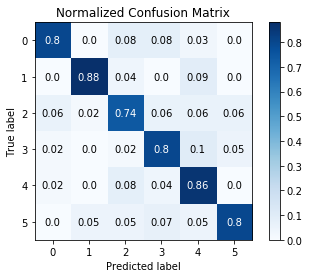

In [69]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred_MLP, normalize=True)

## ==

In [70]:
from sklearn.externals import joblib
data_samples = data_sample.text.values.tolist()
#data_samples

joblib.dump(clf_MLP_hp, 'mlp_hp_model.pkl') 
model = joblib.load('mlp_hp_model.pkl')

docs_new = data_samples

X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = model.predict(X_new_tfidf)

#print data_sample.emotion
#print predicted

accuracy = accuracy_score(data_sample.emotion, predicted)
print 'The resulting accuracy using SVC is ', (100 * accuracy), '%\n'

print(classification_report(data_sample.emotion, predicted))

The resulting accuracy using SVC is  61.1111111111 %

             precision    recall  f1-score   support

          0       0.50      0.33      0.40         6
          1       1.00      0.50      0.67         6
          2       0.71      0.83      0.77         6
          3       0.50      0.83      0.62         6
          4       0.67      0.67      0.67         6
          5       0.50      0.50      0.50         6

avg / total       0.65      0.61      0.60        36



In [71]:
confusion_matrix( data_sample.emotion, predicted)

array([[2, 0, 1, 1, 1, 1],
       [0, 3, 1, 1, 0, 1],
       [1, 0, 5, 0, 0, 0],
       [0, 0, 0, 5, 0, 1],
       [0, 0, 0, 2, 4, 0],
       [1, 0, 0, 1, 1, 3]])

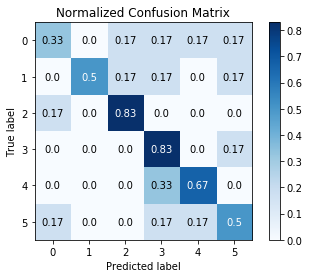

In [72]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix( data_sample.emotion,predicted, normalize=True)

# EVALUATION

In [ ]:
#docs_new = ["aku terkejut"]
#X_new_counts = count_vect.transform(docs_new)
#X_new_tfidf = tfidf_transformer.transform(X_new_counts)

#predict = clf.predict(X_new_tfidf)
#predict

# PLOT

# COBA COBA

In [ ]:
from sklearn.svm import SVC
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_train_tfidf, y_emotion, random_state=0)
# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_validasi_tfidf, y_emotion_validasi, random_state=1)
print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.01, 0.03, 0.06, 0.09, 0.1, 0.3, 0.6, 1, 3, 6, 9, 10]:
    for C in [0.01, 0.03, 0.06, 0.09, 0.1, 0.3, 0.6, 1, 3, 6, 9, 10]:
        # for each combination of parameters train an SVC
        svm = SVC(kernel='rbf', gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the validation set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

In [ ]:
#from sklearn.externals import joblib
#joblib.dump(clf, 'model.pkl') 

In [ ]:
#model = joblib.load('model.pkl')
#docs_new = data_test.text
#X_new_counts = count_vect.transform(docs_new)
#X_new_tfidf = tfidf_transformer.transform(X_new_counts)

#predicted = model.predict(X_new_tfidf)
#predicted